In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from tpot import TPOTClassifier
import tensorflow as tf
# from xgboost import XGBClassifier

# Load Data

In [9]:
nt_all = pd.read_csv('data/nt.all.csv')

In [10]:
nt_coding = pd.read_csv('data/nt.coding.csv')

In [11]:
nt_all.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,...,ENSGR0000263980.4,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1
0,0,150265.480539,4327.845865,713909.310619,59794.653619,15491.855614,47067.296272,184497.123078,303028.753262,101488.999785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,913228.181789,2326.284691,828500.414250,50302.756694,30476.958826,119788.855372,323720.579478,232881.114861,204409.893911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,359658.934678,228971.470681,483960.593070,69872.468893,16789.274018,76493.522968,735607.786830,512566.438580,108147.729799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,135634.675596,0.000000,748257.784782,75504.611322,27890.960291,55978.045025,118630.138127,710455.556708,250891.525261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,81454.831124,177.310309,363281.940134,45622.048124,8563.609511,687378.578868,143523.388792,459940.275222,45368.853671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
nt_all.shape

(1400, 60484)

In [13]:
nt_coding.head()

,Type,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,...,ENSG00000269699.4,ENSG00000269711.1,ENSG00000269741.4,ENSG00000269749.1,ENSG00000269755.1,ENSG00000269846.1,ENSG00000269855.2,ENSG00000269858.4,ENSG00000269881.1,ENSG00000269883.1
0,0,150265.480539,4327.845865,713909.310619,59794.653619,15491.855614,47067.296272,184497.123078,303028.753262,101488.999785,...,491.731252,0.00000,0.000000,0.000000,5530.025272,999.688930,2815.285593,80163.084910,6837.301541,200.744219
1,0,913228.181789,2326.284691,828500.414250,50302.756694,30476.958826,119788.855372,323720.579478,232881.114861,204409.893911,...,146.840679,0.00000,44133.486358,902.703869,0.000000,298.526889,106768.895783,55490.416008,742.455814,0.000000
2,0,359658.934678,228971.470681,483960.593070,69872.468893,16789.274018,76493.522968,735607.786830,512566.438580,108147.729799,...,427.189045,0.00000,0.000000,0.000000,3603.136170,217.118679,1528.603224,62677.148078,4319.906344,0.000000
3,1,135634.675596,0.000000,748257.784782,75504.611322,27890.960291,55978.045025,118630.138127,710455.556708,250891.525261,...,322.662334,0.00000,946.120078,661.189483,1555.144652,218.657354,16318.022871,54779.302382,5030.289480,0.000000
4,0,81454.831124,177.310309,363281.940134,45622.048124,8563.609511,687378.578868,143523.388792,459940.275222,45368.853671,...,201.460549,23513.58332,0.000000,619.239908,970.985025,0.000000,2595.178159,103692.697035,1909.921482,0.000000


In [14]:
nt_coding.shape

(1400, 19562)

## Seperate labels and features

In [15]:
y_coding = nt_coding['Type']
X_coding = nt_coding.drop('Type', axis=1)

In [16]:
y_all = nt_all['Type']
X_all = nt_all.drop('Type', axis=1)

# Pre-processing

Use the l2 norm to normalize each sample

In [17]:
X_coding = np.asarray(normalize(X_coding), dtype='float64')
X_all = np.asarray(normalize(X_all), dtype='float64')

# Exploratory Analysis

## Dimensionality reduction with t-SNE

In [11]:
X_coding_e = TSNE(n_components=2, learning_rate='auto',
               init='random').fit_transform(X_coding)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

# Classification

* k-nearest neighbors
* Support Vector Machine (SVM)
* Naive Bayes
* Decision Tree
* Random Forest

In [12]:
def display_cv_metrics(metrics):
    for k, v in metrics.items():
        print(f'{k}: {np.round(v.mean(), 3)}')

In [13]:
metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [14]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

## k-nearest neighbors

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn_scores_coding = cross_validate(estimator=knn, 
                              X=X_coding,
                              y=y_coding,
                              scoring=metrics,
                              cv=skf)

In [17]:
knn_scores_all = cross_validate(estimator=knn, 
                              X=X_all,
                              y=y_all,
                              scoring=metrics,
                              cv=skf)

In [18]:
display_cv_metrics(knn_scores_coding)

fit_time: 0.135
score_time: 0.332
test_accuracy: 0.903
test_f1: 0.898
test_precision: 0.942
test_recall: 0.859
test_roc_auc: 0.948


In [19]:
display_cv_metrics(knn_scores_all)

fit_time: 0.537
score_time: 1.003
test_accuracy: 0.899
test_f1: 0.892
test_precision: 0.95
test_recall: 0.841
test_roc_auc: 0.952


## Support Vector Machine

In [20]:
svc = SVC()

In [21]:
svc_scores_coding = cross_validate(estimator=svc, 
                              X=X_coding,
                              y=y_coding,
                              scoring=metrics,
                              cv=skf)

In [22]:
svc_scores_all = cross_validate(estimator=svc, 
                              X=X_all,
                              y=y_all,
                              scoring=metrics,
                              cv=skf)

In [23]:
display_cv_metrics(svc_scores_coding)

fit_time: 4.8
score_time: 5.465
test_accuracy: 0.934
test_f1: 0.933
test_precision: 0.947
test_recall: 0.92
test_roc_auc: 0.98


In [24]:
display_cv_metrics(svc_scores_all)

fit_time: 10.144
score_time: 12.774
test_accuracy: 0.934
test_f1: 0.932
test_precision: 0.953
test_recall: 0.913
test_roc_auc: 0.979


## Naive Bayes Classifier

In [25]:
nb = GaussianNB()

In [26]:
nb_scores_coding = cross_validate(estimator=nb, 
                              X=X_coding,
                              y=y_coding,
                              scoring=metrics,
                              cv=skf)

In [27]:
nb_scores_all = cross_validate(estimator=nb, 
                              X=X_all,
                              y=y_all,
                              scoring=metrics,
                              cv=skf)

In [28]:
display_cv_metrics(nb_scores_coding)

fit_time: 0.262
score_time: 0.04
test_accuracy: 0.845
test_f1: 0.828
test_precision: 0.929
test_recall: 0.747
test_roc_auc: 0.85


In [29]:
display_cv_metrics(nb_scores_all)

fit_time: 2.1
score_time: 0.47
test_accuracy: 0.864
test_f1: 0.85
test_precision: 0.951
test_recall: 0.769
test_roc_auc: 0.866


## Decision Tree Classifier

In [30]:
dt = DecisionTreeClassifier(random_state=1)

In [31]:
dt_scores_coding = cross_validate(estimator=dt, 
                              X=X_coding,
                              y=y_coding,
                              scoring=metrics,
                              cv=skf)

In [32]:
dt_scores_all = cross_validate(estimator=dt, 
                              X=X_all,
                              y=y_all,
                              scoring=metrics,
                              cv=skf)

In [33]:
display_cv_metrics(dt_scores_coding)

fit_time: 11.131
score_time: 0.012
test_accuracy: 0.896
test_f1: 0.895
test_precision: 0.9
test_recall: 0.891
test_roc_auc: 0.896


In [34]:
display_cv_metrics(dt_scores_all)

fit_time: 22.249
score_time: 0.067
test_accuracy: 0.899
test_f1: 0.898
test_precision: 0.913
test_recall: 0.883
test_roc_auc: 0.899


## Random Forest Classifier

In [35]:
rf = RandomForestClassifier(max_depth=3, random_state=1)

In [36]:
rf_scores_coding = cross_validate(estimator=rf, 
                              X=X_coding,
                              y=y_coding,
                              scoring=metrics,
                              cv=skf)

In [37]:
rf_scores_all = cross_validate(estimator=rf, 
                              X=X_all,
                              y=y_all,
                              scoring=metrics,
                              cv=skf)

In [38]:
display_cv_metrics(rf_scores_coding)

fit_time: 2.049
score_time: 0.022
test_accuracy: 0.944
test_f1: 0.942
test_precision: 0.96
test_recall: 0.926
test_roc_auc: 0.987


In [39]:
display_cv_metrics(rf_scores_all)

fit_time: 2.911
score_time: 0.067
test_accuracy: 0.945
test_f1: 0.944
test_precision: 0.958
test_recall: 0.931
test_roc_auc: 0.987


## Selecting the best performer

In [40]:
scores_all = [knn_scores_all, svc_scores_all, nb_scores_all, 
              dt_scores_all, rf_scores_all]

scores_coding = [knn_scores_coding, svc_scores_coding, 
                 nb_scores_coding, dt_scores_coding, rf_scores_coding]

names = ['K-Nearest Neighbors', 'Support Vector Classifier', 'Naive Bayes Classifier', 
        'Decision Tree Classifier', 'Random Forest Classifier']

In [41]:
for score in scores_all:
    for k, v in score.items():
        score[k] = v.mean()

In [42]:
for score in scores_coding:
    for k, v in score.items():
        score[k] = v.mean()

### For all genes

In [43]:
pd.DataFrame(scores_all, index=names)

,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
K-Nearest Neighbors,0.536947,1.003020,0.898571,0.892383,0.950288,0.841429,0.951622
Support Vector Classifier,10.143887,12.774068,0.933571,0.932192,0.952572,0.912857,0.979276
Naive Bayes Classifier,2.099991,0.470078,0.864286,0.849692,0.950661,0.768571,0.866245
Decision Tree Classifier,22.249131,0.067377,0.899286,0.897609,0.913030,0.882857,0.899286
Random Forest Classifier,2.911222,0.066663,0.945000,0.944194,0.957779,0.931429,0.987051


### For only protein-coding genes

In [44]:
pd.DataFrame(scores_coding, index=names)

,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
K-Nearest Neighbors,0.134978,0.332214,0.902857,0.898239,0.942285,0.858571,0.948010
Support Vector Classifier,4.799727,5.465398,0.934286,0.933311,0.947381,0.920000,0.979867
Naive Bayes Classifier,0.261998,0.039767,0.845000,0.828028,0.928722,0.747143,0.850378
Decision Tree Classifier,11.131116,0.012201,0.895714,0.895276,0.899695,0.891429,0.895714
Random Forest Classifier,2.049046,0.022036,0.943571,0.942397,0.960221,0.925714,0.987122


## Random Forest and Feature Importances

Random Forest Classifier seems to be the best performer across all cross-validated metrics closely followed by the Support Vector Classifier, for both full data and coding data. 

Dataset with just the protein-coding genes seems to be performing as well as the full dataset despite having fewer features. We will compute Random Forest feature importances based on mean decrease in impurity and display the first 10 genes that are the best predictors of tumor.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_coding, y_coding, 
                                                    test_size=.25, random_state=1)

In [67]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [68]:
importances = rf.feature_importances_

In [69]:
feature_names = list(nt_coding.columns[1:])

In [70]:
importance_df = pd.DataFrame(zip(feature_names, importances), columns=['gene', 'importance'])

### Top 10 genes for predicting tumor

In [71]:
importance_df.sort_values('importance', ascending=False).head(10)

,gene,importance
4702,ENSG00000117650.11,0.013478
913,ENSG00000065328.15,0.012234
10514,ENSG00000162062.13,0.011683
10998,ENSG00000163888.3,0.010862
2119,ENSG00000099953.8,0.010606
5338,ENSG00000123500.8,0.010333
3227,ENSG00000106105.12,0.009977
4471,ENSG00000116014.8,0.009354
15558,ENSG00000186185.12,0.009226
3871,ENSG00000111640.13,0.009031


## Confusion matrix with the predictions for validation set

In [75]:
y_pred = rf.predict(X_test)

In [104]:
cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

In [105]:
test_accuracy = (y_pred == y_test).sum() / len(y_test)
print(f"Test accuracy is {test_accuracy * 100}%")

Test accuracy is 94.0%


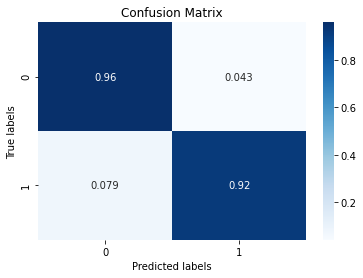

In [106]:
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');

## Using TPOT for model selection

In [19]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(input_matrix)
0.8714285714285714


## Keras for Deep Learning Classifier

In [29]:
size = .25

In [42]:
test_sizes = np.arange(0.05, 0.55, 0.05)

In [ ]:
for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_coding, y_coding, 
                                                        test_size=test_size, random_state=1)
    